# **Time Series Forecasting for Energy Consumption: Optimizing Resource Allocation in Smart Grid Systems**

---

                                  Name : SREELAKSHMI M
                                  Organization : Entri Software Pvt Limited
                                  Date : 13/05/2024
                        


## **Problem Statement**

This project has been done in fulfillment to the Capstone Project requirement of Entri Elevate's Data Science and Machine Learning Program.

This project aims to develop a time series forecasting model for predicting energy consumption
patterns in smart grid systems. By leveraging historical data on energy usage, weather
conditions, holidays, and other relevant factors, the model seeks to forecast future energy
consumption accurately. The goal is to optimize energy distribution and resource allocation,
enabling efficient management of electricity grids. By forecasting energy consumption patterns,
this project contributes to reducing costs, improving grid reliability, and promoting sustainability in
energy management.


## **Objectives**


* Development of an accurate time series forecasting model for energy consumption.
* Optimization of energy distribution and resource allocation in smart grid systems.
* Reduction in operational costs and improved grid reliability.
* Enhanced sustainability through efficient energy management practices.
* Evaluate the performance of different models in predicting Machine failure.
* Evaluate the impact of different feature selection methods on the performance of predictive maintenance models.

## Import Libraries

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


## Import Data

In [4]:
df = pd.read_csv("energy_consumption_dataset.csv")
df

Date/Time  Temperature   Humidity Day of Week Time of Day  \
0      2020-01-01 00:00:00    17.440675  73.264794   Wednesday       00:00   
1      2020-01-01 01:00:00    25.759468  29.280938   Wednesday       01:00   
2      2020-01-01 02:00:00    20.138169  55.772252   Wednesday       02:00   
3      2020-01-01 03:00:00    17.244159  87.520015   Wednesday       03:00   
4      2020-01-01 04:00:00    11.182740  26.383045   Wednesday       04:00   
...                    ...          ...        ...         ...         ...   
43820  2024-12-30 20:00:00    16.224974  45.931201      Monday       20:00   
43821  2024-12-30 21:00:00    -2.638805  64.145829      Monday       21:00   
43822  2024-12-30 22:00:00    23.730335  70.776912      Monday       22:00   
43823  2024-12-30 23:00:00    12.921507  40.567168      Monday       23:00   
43824  2024-12-31 00:00:00    23.664244  52.840541     Tuesday       00:00   

       Season  Holiday Indicator  Previous Day's Energy Consumption  \
0        Fall                  1                        4437.698981   
1      Spring                  1                        2240.248004   
2      Winter                  0                        1443.646518   
3      Summer                  0                        2325.184898   
4        Fall                  0                        1552.041035   
...       ...                ...                                ...   
43820  Summer                  1                        3299.135828   
43821    Fall                  0                        1435.657343   
43822  Spring                  0                        3441.205510   
43823  Spring                  0                        1200.156417   
43824    Fall                  0                        3268.350548   

       Previous Week's Energy Consumption  Energy Price  Daylight Hours  \
0                             1799.303909      0.123206       12.228164   
1                             2109.917892      0.096013       14.950992   
2                             2814.549791      0.161145       11.384525   
3                             4680.163261      0.272355       10.109367   
4                             4080.463060      0.163503        9.012346   
...                                   ...           ...             ...   
43820                         3069.518353      0.135656       12.340619   
43821                         1185.862843      0.238843       11.169718   
43822                         3003.358652      0.209155       15.948723   
43823                         4850.113450      0.286449       14.597026   
43824                         3219.452035      0.266919       11.846411   

       Wind Speed  Solar Irradiance  Population Density  Energy Consumption  
0        0.059692        169.032542         1469.402213         1367.517344  
1       19.246831        705.612502          169.805891         4078.500517  
2       10.978002        268.142230         1988.009121         4614.282050  
3        2.472984        262.186871          174.970181         3578.730578  
4        4.509169        486.224719         1004.081112         4194.210499  
...           ...               ...                 ...                 ...  
43820    3.685611        666.593466         1538.228889         1087.122191  
43821    6.561095        772.779958         1641.830840         4277.546615  
43822    7.276048        567.131701         1800.057131         2915.121073  
43823    7.211708         27.142705          926.475955         2944.563179  
43824    2.971656        373.238730          370.274341         1473.671093  

[43825 rows x 15 columns]

The Dataset has 43825 rows and 15 features

## **Exploratory Data Analysis**

## Sturcture of the Dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43825 entries, 0 to 43824
Data columns (total 15 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Date/Time                           43825 non-null  object 
 1   Temperature                         43825 non-null  float64
 2   Humidity                            43825 non-null  float64
 3   Day of Week                         43825 non-null  object 
 4   Time of Day                         43825 non-null  object 
 5   Season                              43825 non-null  object 
 6   Holiday Indicator                   43825 non-null  int64  
 7   Previous Day's Energy Consumption   43825 non-null  float64
 8   Previous Week's Energy Consumption  43825 non-null  float64
 9   Energy Price                        43825 non-null  float64
 10  Daylight Hours                      43825 non-null  float64
 11  Wind Speed                          43825

The dataset has numerical values and categorical values.

## Basic Statistics

In [6]:
df.describe(include = 'all')

Date/Time   Temperature      Humidity Day of Week  \
count                 43825  43825.000000  43825.000000       43825   
unique                43825           NaN           NaN           7   
top     2020-01-01 00:00:00           NaN           NaN   Wednesday   
freq                      1           NaN           NaN        6264   
mean                    NaN     14.890011     55.001300         NaN   
std                     NaN     14.476096     20.201569         NaN   
min                     NaN     -9.996378     20.000232         NaN   
25%                     NaN      2.318324     37.402173         NaN   
50%                     NaN     14.886739     54.965030         NaN   
75%                     NaN     27.454544     72.478944         NaN   
max                     NaN     39.998898     89.997775         NaN   

       Time of Day  Season  Holiday Indicator  \
count        43825   43825       43825.000000   
unique          24       4                NaN   
top          00:00  Spring                NaN   
freq          1827   11147                NaN   
mean           NaN     NaN           0.050633   
std            NaN     NaN           0.219250   
min            NaN     NaN           0.000000   
25%            NaN     NaN           0.000000   
50%            NaN     NaN           0.000000   
75%            NaN     NaN           0.000000   
max            NaN     NaN           1.000000   

        Previous Day's Energy Consumption  Previous Week's Energy Consumption  \
count                        43825.000000                        43825.000000   
unique                                NaN                                 NaN   
top                                   NaN                                 NaN   
freq                                  NaN                                 NaN   
mean                          3004.992815                         3007.367131   
std                           1150.099329                         1158.462428   
min                           1000.251530                         1000.054170   
25%                           2013.068826                         1995.962354   
50%                           3013.983220                         3012.369499   
75%                           4004.036776                         4014.428878   
max                           4999.898186                         4999.996048   

        Energy Price  Daylight Hours    Wind Speed  Solar Irradiance  \
count   43825.000000    43825.000000  43825.000000      43825.000000   
unique           NaN             NaN           NaN               NaN   
top              NaN             NaN           NaN               NaN   
freq             NaN             NaN           NaN               NaN   
mean        0.174295       11.979391      9.968398        498.817391   
std         0.072037        2.310568      5.787710        288.424913   
min         0.050005        8.000024      0.000416          0.035109   
25%         0.111768        9.968250      4.956682        248.935625   
50%         0.174438       11.971855      9.933075        499.333064   
75%         0.236505       13.978746     14.962423        748.138519   
max         0.299999       15.999874     19.999240        999.927153   

        Population Density  Energy Consumption  
count         43825.000000        43825.000000  
unique                 NaN                 NaN  
top                    NaN                 NaN  
freq                   NaN                 NaN  
mean           1023.628163         3008.245695  
std             562.421323         1153.422006  
min              50.011787         1000.033142  
25%             537.001881         2012.751540  
50%            1021.824580         3017.398352  
75%            1511.251895         4008.610275  
max            1999.989309         4999.915113

## Checking for null values

In [7]:
df.isnull().sum()

Date/Time                             0
Temperature                           0
Humidity                              0
Day of Week                           0
Time of Day                           0
Season                                0
Holiday Indicator                     0
Previous Day's Energy Consumption     0
Previous Week's Energy Consumption    0
Energy Price                          0
Daylight Hours                        0
Wind Speed                            0
Solar Irradiance                      0
Population Density                    0
Energy Consumption                    0
dtype: int64

There are no null values.

## Dataset columns

In [8]:
df.columns

Index(['Date/Time', 'Temperature', 'Humidity', 'Day of Week', 'Time of Day',
       'Season', 'Holiday Indicator', 'Previous Day's Energy Consumption',
       'Previous Week's Energy Consumption', 'Energy Price', 'Daylight Hours',
       'Wind Speed', 'Solar Irradiance', 'Population Density',
       'Energy Consumption'],
      dtype='object')

## Checking for Duplicate values

In [9]:
df.duplicated(keep = False).sum()

0

No duplicate values.

##Correlation matrix of numerical features

Text(0.5, 1.0, 'Correlation matrix')

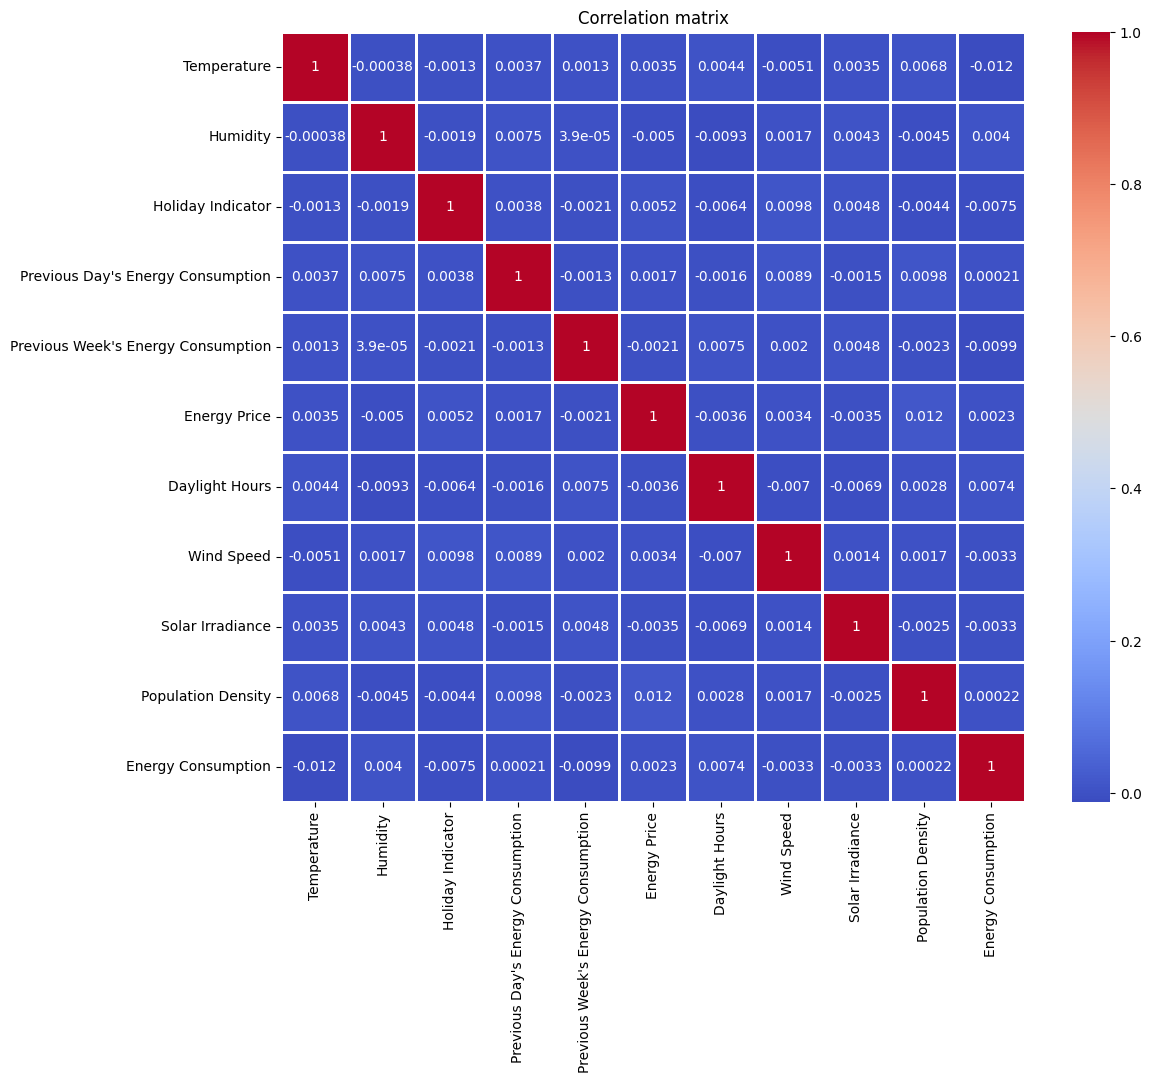

In [10]:
features = df.drop(columns = ["Date/Time","Day of Week","Time of Day","Season"])
features_cor = features.corr()
plt.figure(figsize = (12,10))
sns.heatmap(features_cor,annot = True,cmap = "coolwarm",linewidth = 1)
plt.title("Correlation matrix")

The correlation between the features and target variable is very low, this could affect the model performance.

## Histogram of features

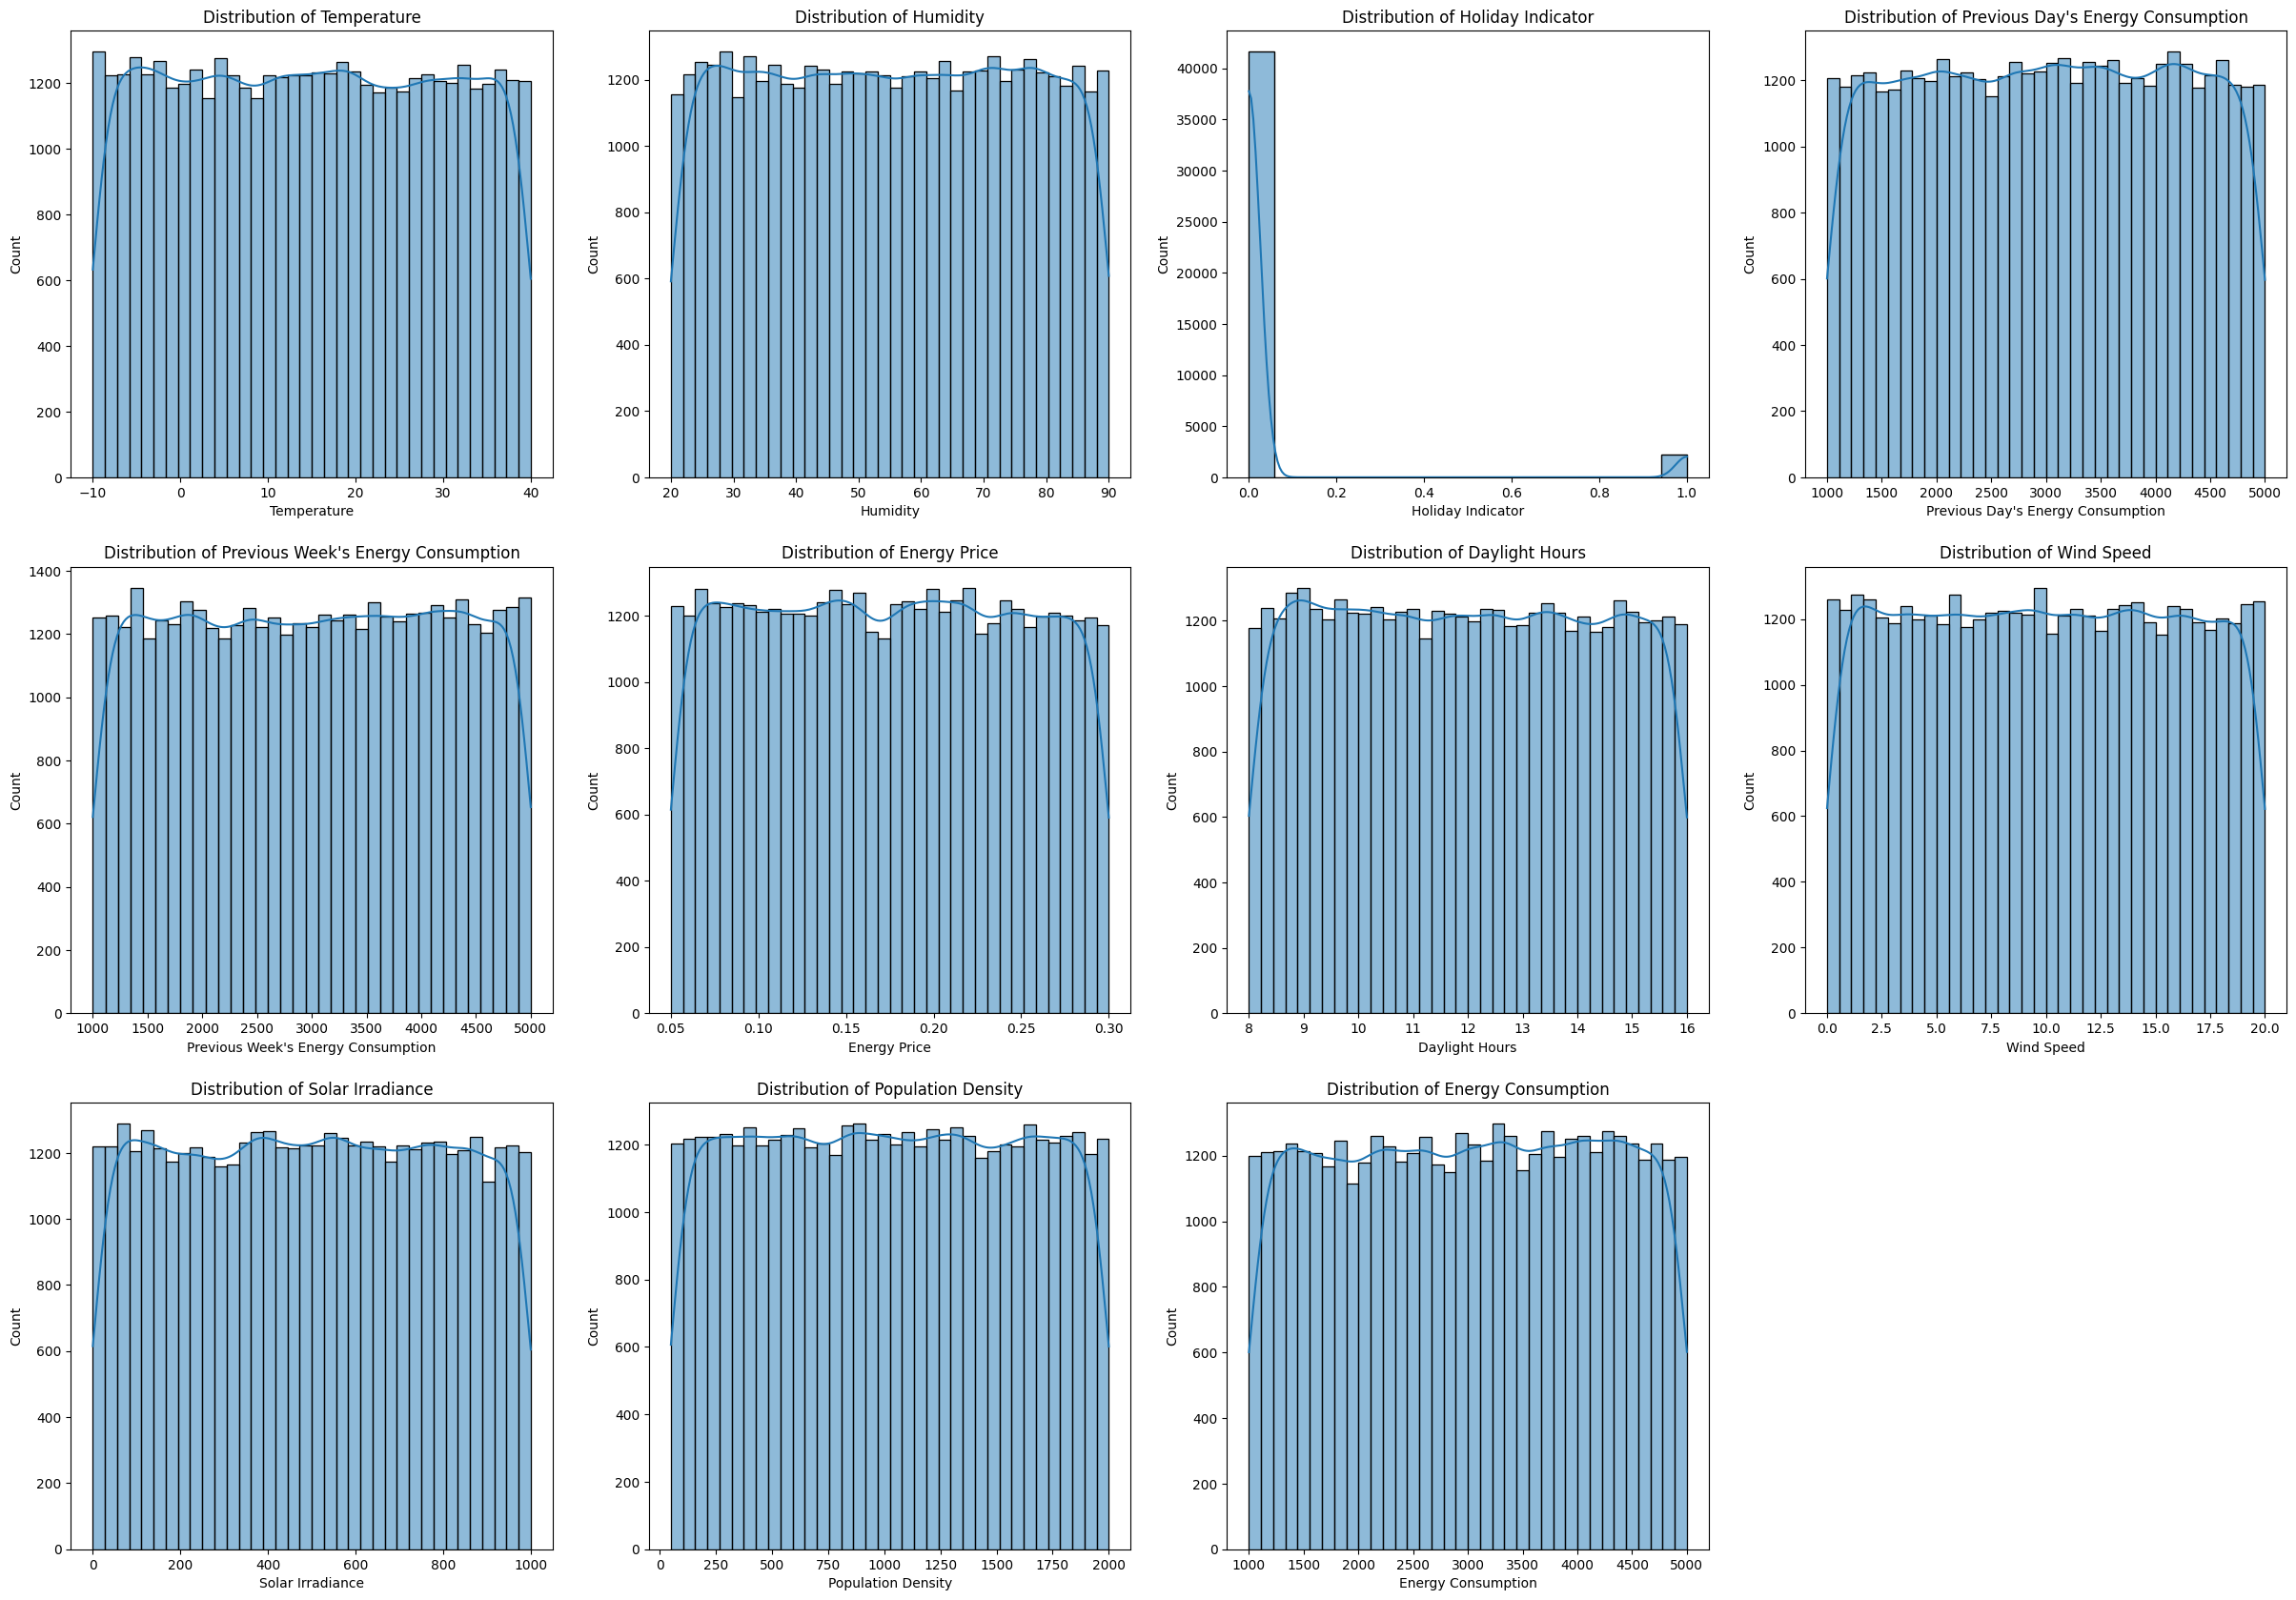

In [9]:
plt.figure(figsize = (30,28))
for i,col in enumerate(features.columns,1):
  plt.subplot(4,4,i)
  sns.histplot(features[col],kde = True)
  plt.title(f"Distribution of {col}")

Here we can see the distribution of the columns in our dataset

## Pairplot of features

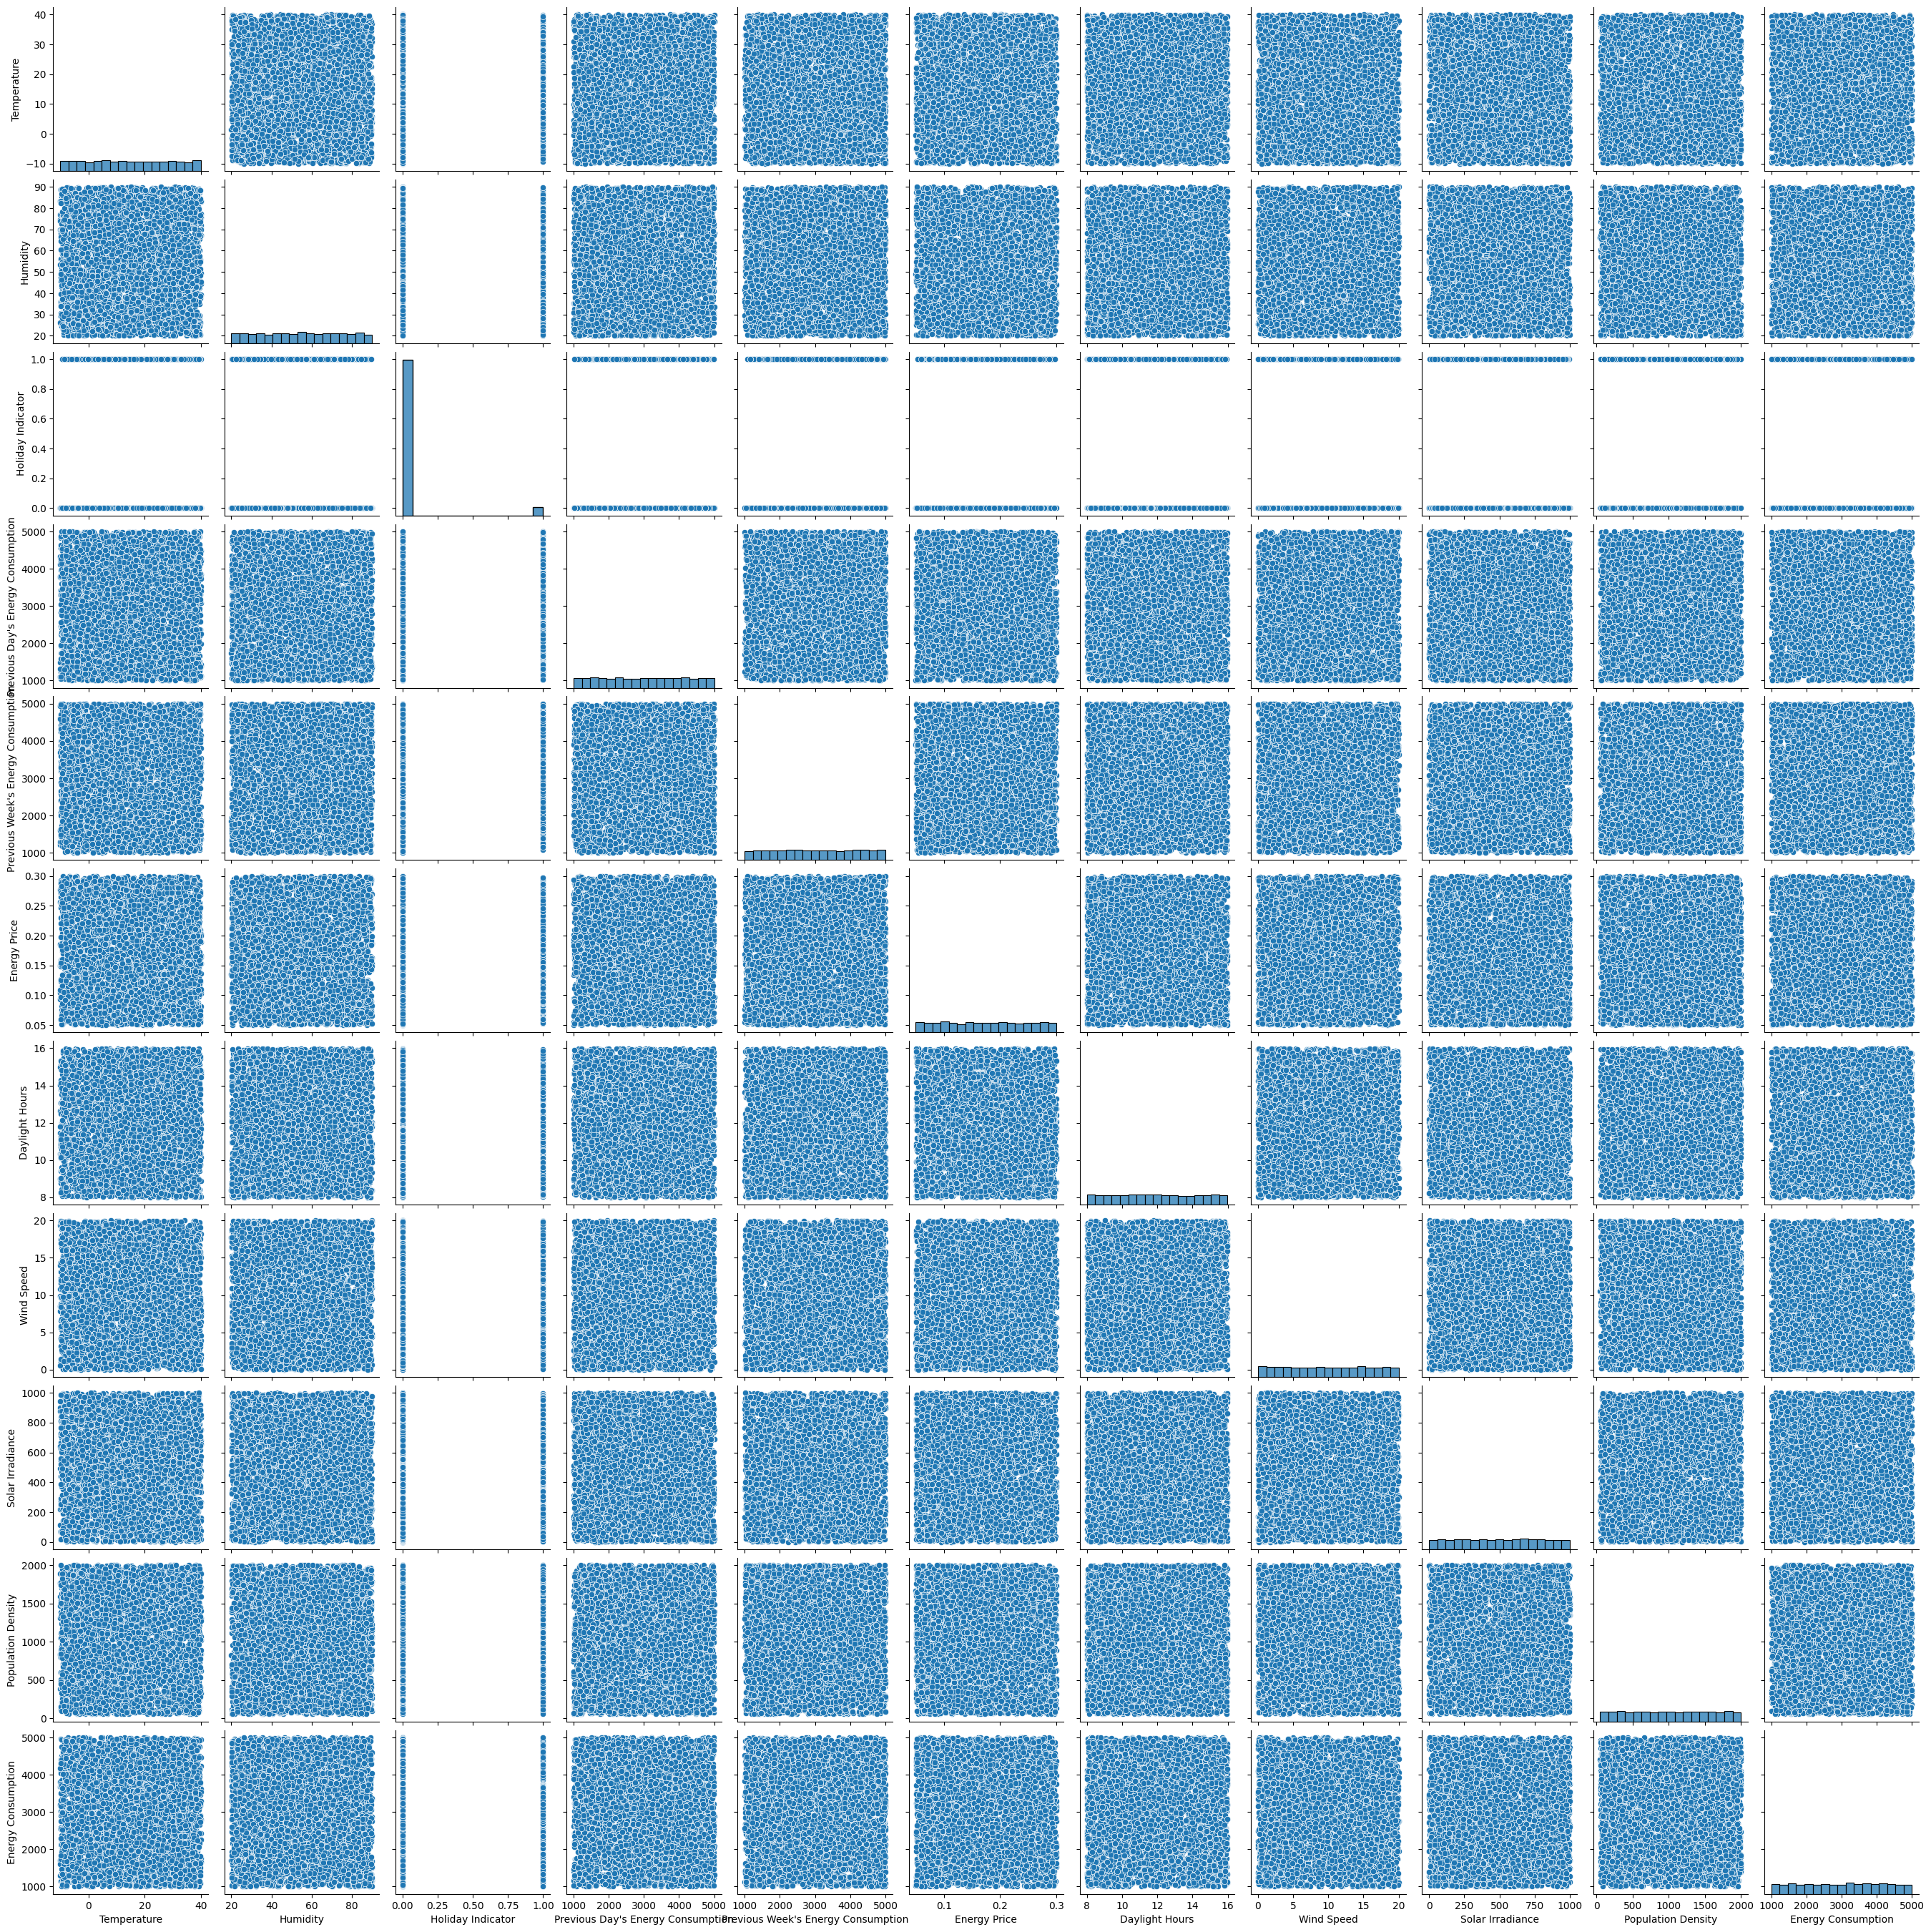

In [ ]:
sns.pairplot(features)

Enables the visualization of the relationship between each pair of variables in a dataset.

## Boxplot of features

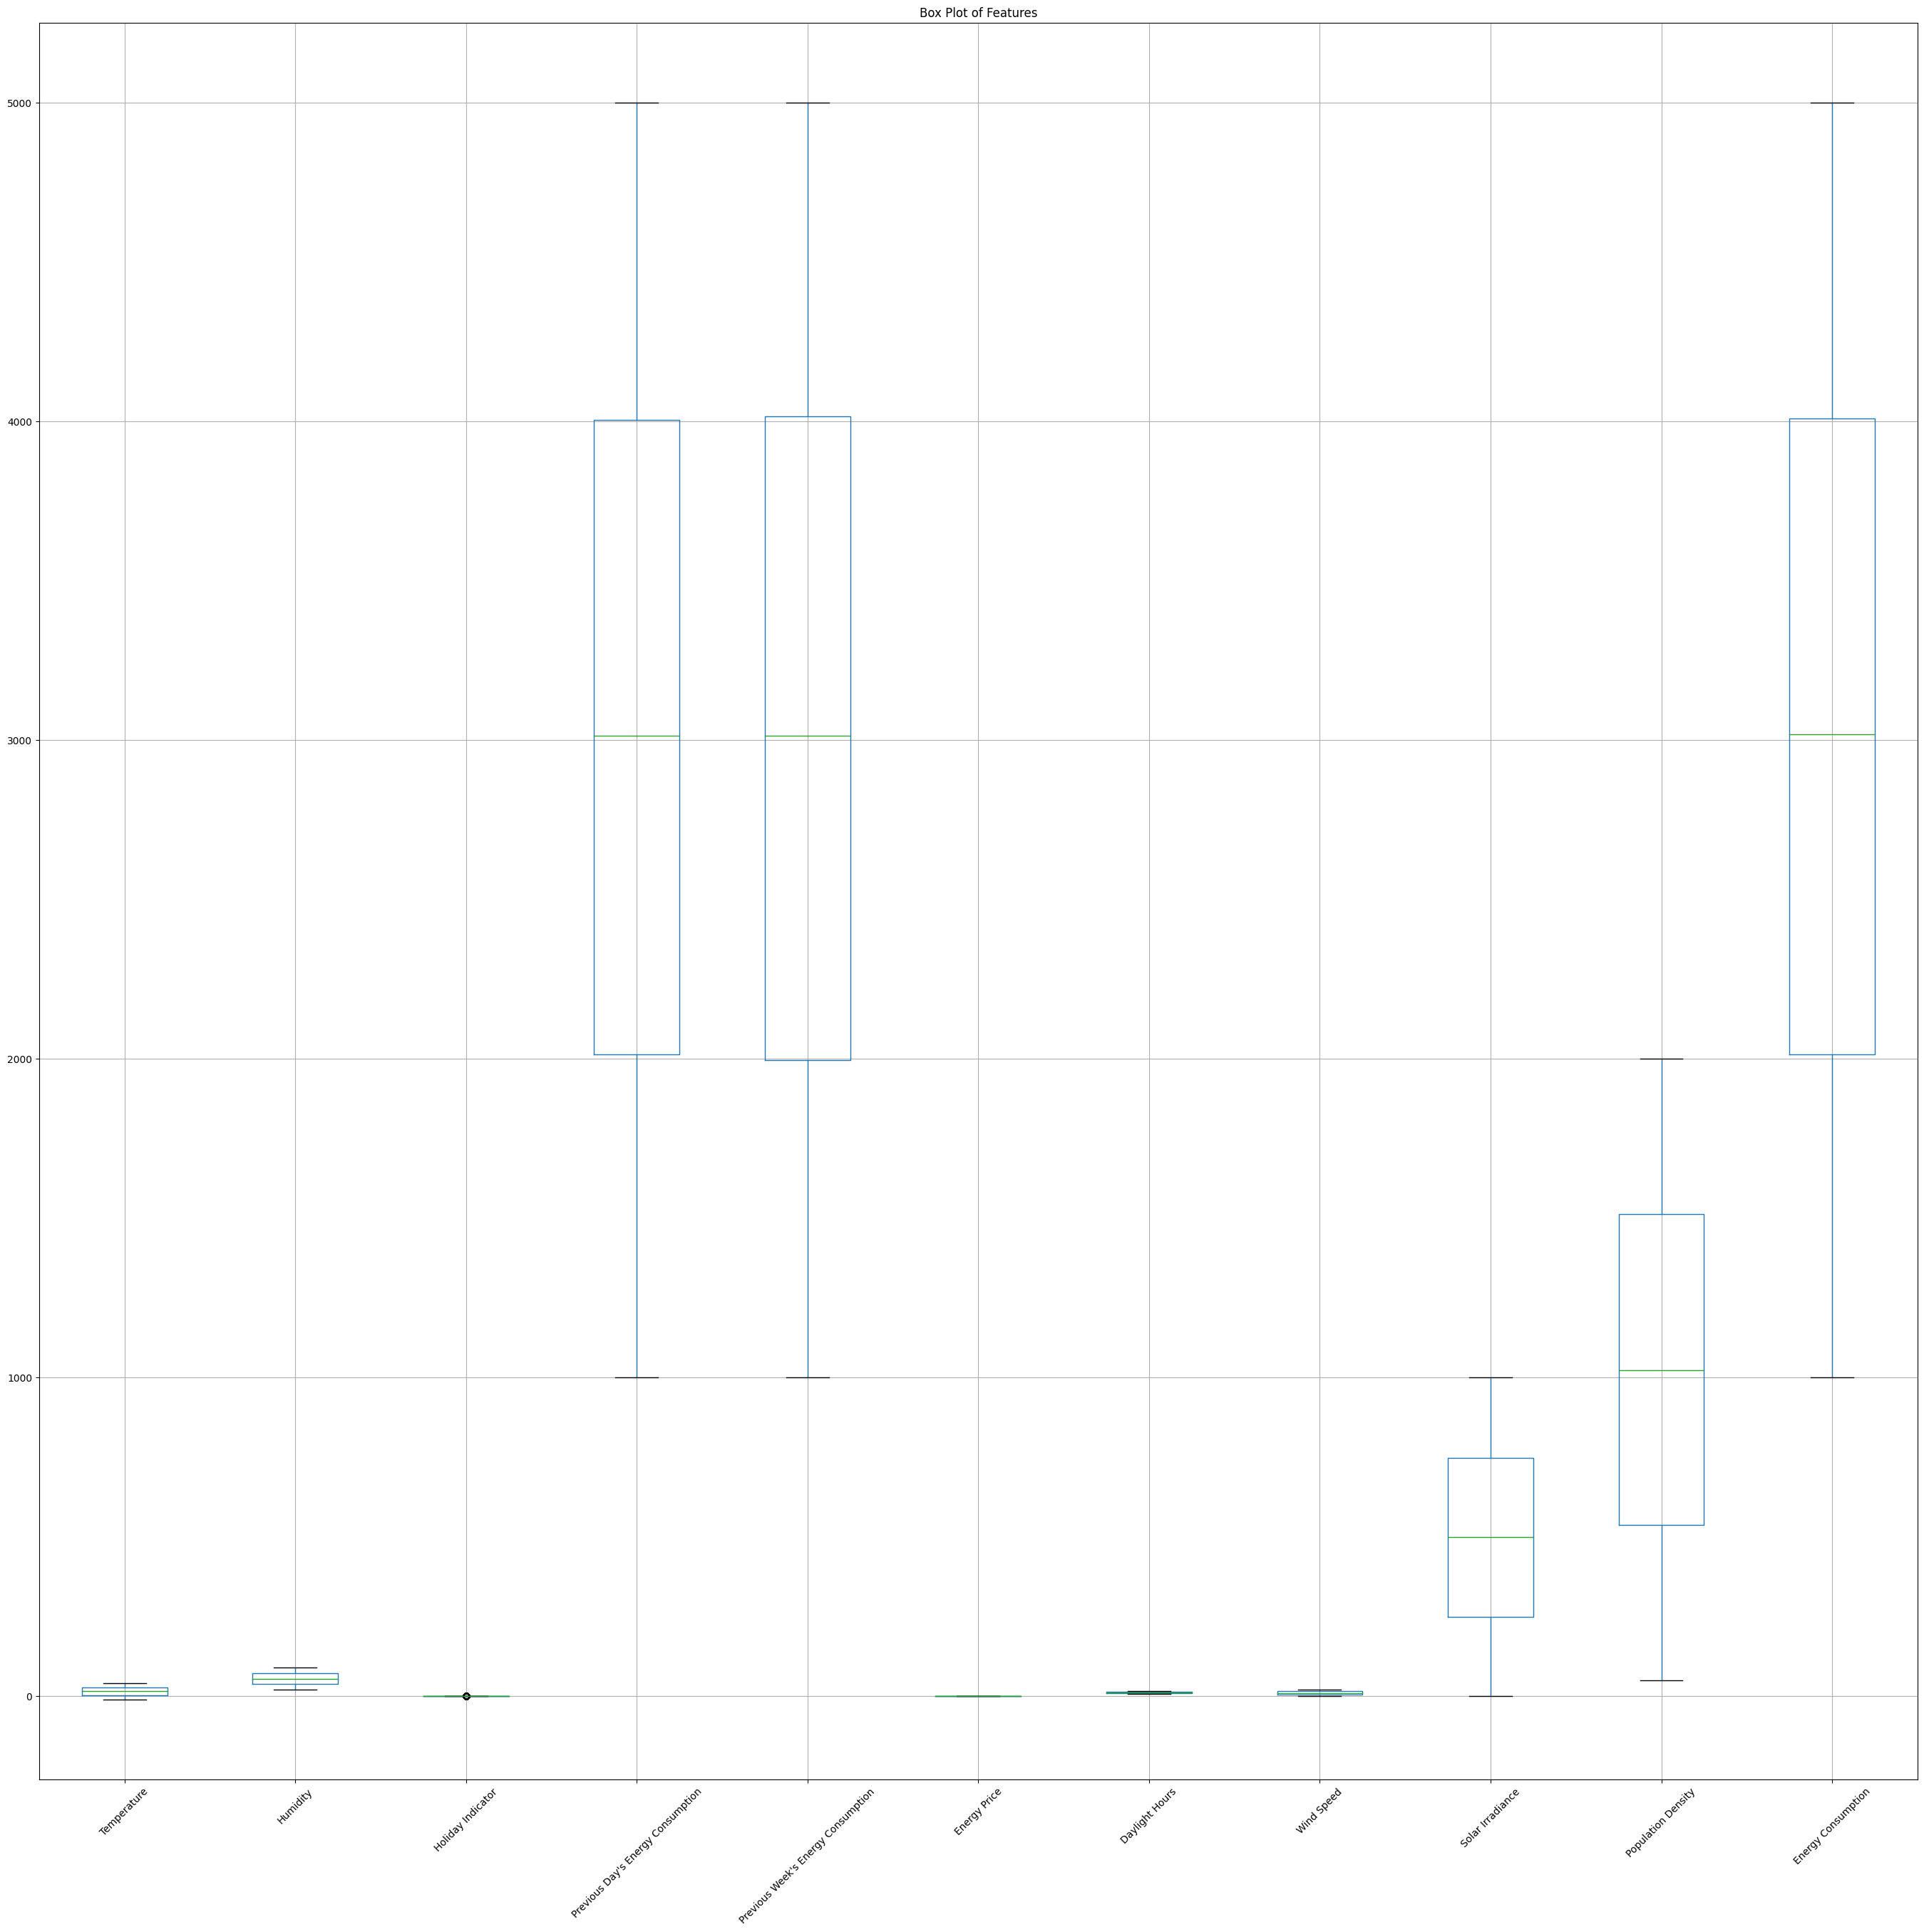

In [11]:
required_columns = ['Temperature', 'Humidity', 'Holiday Indicator',
       "Previous Day's Energy Consumption",
       "Previous Week's Energy Consumption", 'Energy Price', 'Daylight Hours',
       'Wind Speed', 'Solar Irradiance', 'Population Density',
       'Energy Consumption']
df.boxplot (column = required_columns,figsize = (34,32) )
plt.xticks(rotation = 45)
plt.title("Box Plot of Features")
plt.show()

Look like there are some outliers in 'Holiday Indicator'.

## Numerical Columns

In [12]:
features.columns

Index(['Temperature', 'Humidity', 'Holiday Indicator',
       'Previous Day's Energy Consumption',
       'Previous Week's Energy Consumption', 'Energy Price', 'Daylight Hours',
       'Wind Speed', 'Solar Irradiance', 'Population Density',
       'Energy Consumption'],
      dtype='object')

## Checking for outliers using z-score

In [13]:
z_score = (df[required_columns]-df[required_columns].mean())/df[required_columns].std()
threshold = 3
outliers = (z_score > threshold) | (z_score < -threshold)
print("outliers-")
print(outliers.sum())

outliers-
Temperature                              0
Humidity                                 0
Holiday Indicator                     2219
Previous Day's Energy Consumption        0
Previous Week's Energy Consumption       0
Energy Price                             0
Daylight Hours                           0
Wind Speed                               0
Solar Irradiance                         0
Population Density                       0
Energy Consumption                       0
dtype: int64


Found some outliers

## Checking the values distribution in Holiday Indicator

In [14]:
df['Holiday Indicator'].value_counts()

Holiday Indicator
0    41606
1     2219
Name: count, dtype: int64

Look like the outliers are count of 1s.

In [ ]:
# q1 = df['Holiday Indicator'].quantile(0.25)
# q3 = df['Holiday Indicator'].quantile(0.75)
# iqr = q3 - q1
# lower_whisker_value = q1 - 1.5*iqr
# upper_whisker_value = q3 + 1.5*iqr
# outliers_iqr = (df['Holiday Indicator']<lower_whisker_value)| (df['Holiday Indicator']>upper_whisker_value)
# print("outliers:",outliers_iqr.sum())

In [ ]:
# df = df[~outliers_iqr]
# df

## Converting Date/Time column into datetime format

In [15]:
df['Date/Time'] = pd.to_datetime(df['Date/Time'])
df

Date/Time  Temperature   Humidity Day of Week Time of Day  \
0     2020-01-01 00:00:00    17.440675  73.264794   Wednesday       00:00   
1     2020-01-01 01:00:00    25.759468  29.280938   Wednesday       01:00   
2     2020-01-01 02:00:00    20.138169  55.772252   Wednesday       02:00   
3     2020-01-01 03:00:00    17.244159  87.520015   Wednesday       03:00   
4     2020-01-01 04:00:00    11.182740  26.383045   Wednesday       04:00   
...                   ...          ...        ...         ...         ...   
43820 2024-12-30 20:00:00    16.224974  45.931201      Monday       20:00   
43821 2024-12-30 21:00:00    -2.638805  64.145829      Monday       21:00   
43822 2024-12-30 22:00:00    23.730335  70.776912      Monday       22:00   
43823 2024-12-30 23:00:00    12.921507  40.567168      Monday       23:00   
43824 2024-12-31 00:00:00    23.664244  52.840541     Tuesday       00:00   

       Season  Holiday Indicator  Previous Day's Energy Consumption  \
0        Fall                  1                        4437.698981   
1      Spring                  1                        2240.248004   
2      Winter                  0                        1443.646518   
3      Summer                  0                        2325.184898   
4        Fall                  0                        1552.041035   
...       ...                ...                                ...   
43820  Summer                  1                        3299.135828   
43821    Fall                  0                        1435.657343   
43822  Spring                  0                        3441.205510   
43823  Spring                  0                        1200.156417   
43824    Fall                  0                        3268.350548   

       Previous Week's Energy Consumption  Energy Price  Daylight Hours  \
0                             1799.303909      0.123206       12.228164   
1                             2109.917892      0.096013       14.950992   
2                             2814.549791      0.161145       11.384525   
3                             4680.163261      0.272355       10.109367   
4                             4080.463060      0.163503        9.012346   
...                                   ...           ...             ...   
43820                         3069.518353      0.135656       12.340619   
43821                         1185.862843      0.238843       11.169718   
43822                         3003.358652      0.209155       15.948723   
43823                         4850.113450      0.286449       14.597026   
43824                         3219.452035      0.266919       11.846411   

       Wind Speed  Solar Irradiance  Population Density  Energy Consumption  
0        0.059692        169.032542         1469.402213         1367.517344  
1       19.246831        705.612502          169.805891         4078.500517  
2       10.978002        268.142230         1988.009121         4614.282050  
3        2.472984        262.186871          174.970181         3578.730578  
4        4.509169        486.224719         1004.081112         4194.210499  
...           ...               ...                 ...                 ...  
43820    3.685611        666.593466         1538.228889         1087.122191  
43821    6.561095        772.779958         1641.830840         4277.546615  
43822    7.276048        567.131701         1800.057131         2915.121073  
43823    7.211708         27.142705          926.475955         2944.563179  
43824    2.971656        373.238730          370.274341         1473.671093  

[43825 rows x 15 columns]

Checking Structure again

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43825 entries, 0 to 43824
Data columns (total 15 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Date/Time                           43825 non-null  datetime64[ns]
 1   Temperature                         43825 non-null  float64       
 2   Humidity                            43825 non-null  float64       
 3   Day of Week                         43825 non-null  object        
 4   Time of Day                         43825 non-null  object        
 5   Season                              43825 non-null  object        
 6   Holiday Indicator                   43825 non-null  int64         
 7   Previous Day's Energy Consumption   43825 non-null  float64       
 8   Previous Week's Energy Consumption  43825 non-null  float64       
 9   Energy Price                        43825 non-null  float64       
 10  Daylight Hours        

## Extract numerical components

In [17]:
# extract numerical components
df['year'] = df['Date/Time'].dt.year
df['month'] = df['Date/Time'].dt.month
df['day'] = df['Date/Time'].dt.day
df['hour'] = df['Date/Time'].dt.hour
df['minute'] = df['Date/Time'].dt.minute
df['second'] = df['Date/Time'].dt.second

##New dataset

In [18]:
df

Date/Time  Temperature   Humidity Day of Week Time of Day  \
0     2020-01-01 00:00:00    17.440675  73.264794   Wednesday       00:00   
1     2020-01-01 01:00:00    25.759468  29.280938   Wednesday       01:00   
2     2020-01-01 02:00:00    20.138169  55.772252   Wednesday       02:00   
3     2020-01-01 03:00:00    17.244159  87.520015   Wednesday       03:00   
4     2020-01-01 04:00:00    11.182740  26.383045   Wednesday       04:00   
...                   ...          ...        ...         ...         ...   
43820 2024-12-30 20:00:00    16.224974  45.931201      Monday       20:00   
43821 2024-12-30 21:00:00    -2.638805  64.145829      Monday       21:00   
43822 2024-12-30 22:00:00    23.730335  70.776912      Monday       22:00   
43823 2024-12-30 23:00:00    12.921507  40.567168      Monday       23:00   
43824 2024-12-31 00:00:00    23.664244  52.840541     Tuesday       00:00   

       Season  Holiday Indicator  Previous Day's Energy Consumption  \
0        Fall                  1                        4437.698981   
1      Spring                  1                        2240.248004   
2      Winter                  0                        1443.646518   
3      Summer                  0                        2325.184898   
4        Fall                  0                        1552.041035   
...       ...                ...                                ...   
43820  Summer                  1                        3299.135828   
43821    Fall                  0                        1435.657343   
43822  Spring                  0                        3441.205510   
43823  Spring                  0                        1200.156417   
43824    Fall                  0                        3268.350548   

       Previous Week's Energy Consumption  Energy Price  ...  Wind Speed  \
0                             1799.303909      0.123206  ...    0.059692   
1                             2109.917892      0.096013  ...   19.246831   
2                             2814.549791      0.161145  ...   10.978002   
3                             4680.163261      0.272355  ...    2.472984   
4                             4080.463060      0.163503  ...    4.509169   
...                                   ...           ...  ...         ...   
43820                         3069.518353      0.135656  ...    3.685611   
43821                         1185.862843      0.238843  ...    6.561095   
43822                         3003.358652      0.209155  ...    7.276048   
43823                         4850.113450      0.286449  ...    7.211708   
43824                         3219.452035      0.266919  ...    2.971656   

       Solar Irradiance  Population Density  Energy Consumption  year  month  \
0            169.032542         1469.402213         1367.517344  2020      1   
1            705.612502          169.805891         4078.500517  2020      1   
2            268.142230         1988.009121         4614.282050  2020      1   
3            262.186871          174.970181         3578.730578  2020      1   
4            486.224719         1004.081112         4194.210499  2020      1   
...                 ...                 ...                 ...   ...    ...   
43820        666.593466         1538.228889         1087.122191  2024     12   
43821        772.779958         1641.830840         4277.546615  2024     12   
43822        567.131701         1800.057131         2915.121073  2024     12   
43823         27.142705          926.475955         2944.563179  2024     12   
43824        373.238730          370.274341         1473.671093  2024     12   

       day  hour  minute  second  
0        1     0       0       0  
1        1     1       0       0  
2        1     2       0       0  
3        1     3       0       0  
4        1     4       0       0  
...    ...   ...     ...     ...  
43820   30    20       0       0  
43821   30    21       0       0  
43822   30    22       0       0  
43823   30    

## count of zeros in minute and second columns

In [19]:
zeros_count = (df[["minute","second"]] == 0).sum()
zeros_count

minute    43825
second    43825
dtype: int64

## Droping unwanted columns

In [20]:
data = df.drop(columns = ['minute','second','Date/Time','Time of Day','day','hour','Holiday Indicator'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43825 entries, 0 to 43824
Data columns (total 14 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Temperature                         43825 non-null  float64
 1   Humidity                            43825 non-null  float64
 2   Day of Week                         43825 non-null  object 
 3   Season                              43825 non-null  object 
 4   Previous Day's Energy Consumption   43825 non-null  float64
 5   Previous Week's Energy Consumption  43825 non-null  float64
 6   Energy Price                        43825 non-null  float64
 7   Daylight Hours                      43825 non-null  float64
 8   Wind Speed                          43825 non-null  float64
 9   Solar Irradiance                    43825 non-null  float64
 10  Population Density                  43825 non-null  float64
 11  Energy Consumption                  43825

## Encoding categorical features

In [21]:
df_encoded = pd.get_dummies(data,columns = ['Day of Week','Season'],drop_first = True,dtype = int)
df_encoded

Temperature   Humidity  Previous Day's Energy Consumption  \
0        17.440675  73.264794                        4437.698981   
1        25.759468  29.280938                        2240.248004   
2        20.138169  55.772252                        1443.646518   
3        17.244159  87.520015                        2325.184898   
4        11.182740  26.383045                        1552.041035   
...            ...        ...                                ...   
43820    16.224974  45.931201                        3299.135828   
43821    -2.638805  64.145829                        1435.657343   
43822    23.730335  70.776912                        3441.205510   
43823    12.921507  40.567168                        1200.156417   
43824    23.664244  52.840541                        3268.350548   

       Previous Week's Energy Consumption  Energy Price  Daylight Hours  \
0                             1799.303909      0.123206       12.228164   
1                             2109.917892      0.096013       14.950992   
2                             2814.549791      0.161145       11.384525   
3                             4680.163261      0.272355       10.109367   
4                             4080.463060      0.163503        9.012346   
...                                   ...           ...             ...   
43820                         3069.518353      0.135656       12.340619   
43821                         1185.862843      0.238843       11.169718   
43822                         3003.358652      0.209155       15.948723   
43823                         4850.113450      0.286449       14.597026   
43824                         3219.452035      0.266919       11.846411   

       Wind Speed  Solar Irradiance  Population Density  Energy Consumption  \
0        0.059692        169.032542         1469.402213         1367.517344   
1       19.246831        705.612502          169.805891         4078.500517   
2       10.978002        268.142230         1988.009121         4614.282050   
3        2.472984        262.186871          174.970181         3578.730578   
4        4.509169        486.224719         1004.081112         4194.210499   
...           ...               ...                 ...                 ...   
43820    3.685611        666.593466         1538.228889         1087.122191   
43821    6.561095        772.779958         1641.830840         4277.546615   
43822    7.276048        567.131701         1800.057131         2915.121073   
43823    7.211708         27.142705          926.475955         2944.563179   
43824    2.971656        373.238730          370.274341         1473.671093   

       ...  month  Day of Week_Monday  Day of Week_Saturday  \
0      ...      1                   0                     0   
1      ...      1                   0                     0   
2      ...      1                   0                     0   
3      ...      1                   0                     0   
4      ...      1                   0                     0   
...    ...    ...                 ...                   ...   
43820  ...     12                   1                     0   
43821  ...     12                   1                     0   
43822  ...     12                   1                     0   
43823  ...     12                   1                     0   
43824  ...     12                   0                     0   

       Day of Week_Sunday  Day of Week_Thursday  Day of Week_Tuesday  \
0                       0                     0                    0   
1                       0                     0                    0   
2                       0                     0                    0   
3                       0                     0                    0   
4                       0                     0                    0   
...                   ...                   ...                  ...   
43820                   0                     0                    0   
43821  

## Checking the encoded dataset's structure

In [22]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43825 entries, 0 to 43824
Data columns (total 21 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Temperature                         43825 non-null  float64
 1   Humidity                            43825 non-null  float64
 2   Previous Day's Energy Consumption   43825 non-null  float64
 3   Previous Week's Energy Consumption  43825 non-null  float64
 4   Energy Price                        43825 non-null  float64
 5   Daylight Hours                      43825 non-null  float64
 6   Wind Speed                          43825 non-null  float64
 7   Solar Irradiance                    43825 non-null  float64
 8   Population Density                  43825 non-null  float64
 9   Energy Consumption                  43825 non-null  float64
 10  year                                43825 non-null  int32  
 11  month                               43825

## **Feature Scaling, Dateset Splitting, Model Building and Evaluation (Without feature Selection)**

Splitting the dataset into 80-20, that is, 80% of the data is for training and 20% of the data is for testing.

Using Standard scaler for scaling the independent variables.

Using SVR, MLPRegressor, Random Forest Regressor and Linear Regression for model building. Evaluation metrics like mean_squared_error, mean_absolute_error, r2_score are used.

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X = df_encoded.drop(columns = "Energy Consumption")
y = df_encoded["Energy Consumption"]

scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X),columns = X.columns)

X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size = 0.2,random_state = 42)




In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score



# Support Vector Regression (SVR)
svr_model = SVR()
svr_model.fit(X_train, y_train)
svr_predictions = svr_model.predict(X_test)

# Multi-layer Perceptron Regressor (MLPRegressor)
mlp_model = MLPRegressor()
mlp_model.fit(X_train, y_train)
mlp_predictions = mlp_model.predict(X_test)

# Random Forest Regressor
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)

# Evaluation Metrics
def evaluate(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mse, mae, r2

# Evaluating SVR
svr_mse, svr_mae, svr_r2 = evaluate(y_test, svr_predictions)
print("SVR Mean Squared Error:", svr_mse)
print("SVR Mean Absolute Error:", svr_mae)
print("SVR R^2 Score:", svr_r2)

# Evaluating MLPRegressor
mlp_mse, mlp_mae, mlp_r2 = evaluate(y_test, mlp_predictions)
print("MLPRegressor Mean Squared Error:", mlp_mse)
print("MLPRegressor Mean Absolute Error:", mlp_mae)
print("MLPRegressor R^2 Score:", mlp_r2)

# Evaluating Random Forest Regressor
rf_mse, rf_mae, rf_r2 = evaluate(y_test, rf_predictions)
print("Random Forest Mean Squared Error:", rf_mse)
print("Random Forest Mean Absolute Error:", rf_mae)
print("Random Forest R^2 Score:", rf_r2)

# Evaluating Linear Regression
lr_mse, lr_mae, lr_r2 = evaluate(y_test, lr_predictions)
print("Linear Regression Mean Squared Error:", lr_mse)
print("Linear Regression Mean Absolute Error:", lr_mae)
print("Linear Regression R^2 Score:", lr_r2)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


SVR Mean Squared Error: 1348651.0578220065
SVR Mean Absolute Error: 1009.5874806594006
SVR R^2 Score: -3.0384284419371355e-05
MLPRegressor Mean Squared Error: 1366222.2285624696
MLPRegressor Mean Absolute Error: 1014.5425306691229
MLPRegressor R^2 Score: -0.01305948067373297
Random Forest Mean Squared Error: 1370267.7512161375
Random Forest Mean Absolute Error: 1014.5530437764188
Random Forest R^2 Score: -0.01605925259436014
Linear Regression Mean Squared Error: 1347513.7763508118
Linear Regression Mean Absolute Error: 1009.0836362526882
Linear Regression R^2 Score: 0.0008129146698074852


Without using any feature selection methods or hyperparameter tuning linear regression gives the best r2 score (0.00081291). The other models give negative r2 score.

## **Hyperparameter tuning**

In [ ]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression



# Define hyperparameter grids for each model
svr_param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto']
}

mlp_param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive']
}

rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Models
svr_model = SVR()
mlp_model = MLPRegressor()
rf_model = RandomForestRegressor()

# Hyperparameter tuning using GridSearchCV
svr_grid_search = GridSearchCV(svr_model, svr_param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
mlp_grid_search = GridSearchCV(mlp_model, mlp_param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
rf_grid_search = GridSearchCV(rf_model, rf_param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Train the models
svr_grid_search.fit(X_train, y_train)
mlp_grid_search.fit(X_train, y_train)
rf_grid_search.fit(X_train, y_train)

# Evaluate on test set
svr_test_pred = svr_grid_search.predict(X_test)
mlp_test_pred = mlp_grid_search.predict(X_test)
rf_test_pred = rf_grid_search.predict(X_test)

# Calculate test MSE
svr_test_mse = mean_squared_error(y_test, svr_test_pred)
mlp_test_mse = mean_squared_error(y_test, mlp_test_pred)
rf_test_mse = mean_squared_error(y_test, rf_test_pred)

# Print test MSE
print("SVR Test MSE:", svr_test_mse)
print("MLPRegressor Test MSE:", mlp_test_mse)
print("Random Forest Test MSE:", rf_test_mse)

# Print best hyperparameters and best score for each model
print("SVR Best Hyperparameters:", svr_grid_search.best_params_)
print("SVR Best Score:", svr_grid_search.best_score_)

print("MLPRegressor Best Hyperparameters:", mlp_grid_search.best_params_)
print("MLPRegressor Best Score:", mlp_grid_search.best_score_)

print("Random Forest Best Hyperparameters:", rf_grid_search.best_params_)
print("Random Forest Best Score:", rf_grid_search.best_score_)


The selection process of hyperparameters takes long time.It's a time consuming process.Furthermore my systems requirements demands more time execution.I ran the code for almost 15 hours,But didn't finish the execution.



## **Feature selection**

## 1. Selectkbest

In [25]:

from sklearn.feature_selection import SelectKBest, f_regression

# SelectKBest with f_regression
selector_kbest = SelectKBest(score_func=f_regression, k=15)
X_kbest = selector_kbest.fit_transform(X_train, y_train)

# Get the selected feature indices
selected_indices_kbest = selector_kbest.get_support(indices=True)

# Get the names of the selected features
selected_features_kbest = X_train.columns[selected_indices_kbest]

print("Selected features using SelectKBest:", selected_features_kbest)

Selected features using SelectKBest: Index(['Temperature', 'Previous Week's Energy Consumption', 'Daylight Hours',
       'Wind Speed', 'Solar Irradiance', 'month', 'Day of Week_Monday',
       'Day of Week_Saturday', 'Day of Week_Sunday', 'Day of Week_Thursday',
       'Day of Week_Tuesday', 'Day of Week_Wednesday', 'Season_Spring',
       'Season_Summer', 'Season_Winter'],
      dtype='object')


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

X1 = X_scaled[['Temperature', "Previous Week's Energy Consumption", 'Daylight Hours',
       'Wind Speed', 'Solar Irradiance', 'month', 'Day of Week_Monday',
       'Day of Week_Saturday', 'Day of Week_Sunday', 'Day of Week_Thursday',
       'Day of Week_Tuesday', 'Day of Week_Wednesday', 'Season_Spring',
       'Season_Summer', 'Season_Winter']]

y1 = y

X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1,test_size = 0.2,random_state = 42)


# Support Vector Regression (SVR)
svr_model = SVR()
svr_model.fit(X1_train, y1_train)
svr_predictions = svr_model.predict(X1_test)

# Multi-layer Perceptron Regressor (MLPRegressor)
mlp_model = MLPRegressor()
mlp_model.fit(X1_train, y1_train)
mlp_predictions = mlp_model.predict(X1_test)

# Random Forest Regressor
rf_model = RandomForestRegressor()
rf_model.fit(X1_train, y1_train)
rf_predictions = rf_model.predict(X1_test)

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X1_train, y1_train)
lr_predictions = lr_model.predict(X1_test)

# Evaluation Metrics
def evaluate(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mse, mae, r2

# Evaluating SVR
svr_mse, svr_mae, svr_r2 = evaluate(y1_test, svr_predictions)
print("SVR Mean Squared Error:", svr_mse)
print("SVR Mean Absolute Error:", svr_mae)
print("SVR R^2 Score:", svr_r2)

# Evaluating MLPRegressor
mlp_mse, mlp_mae, mlp_r2 = evaluate(y1_test, mlp_predictions)
print("MLPRegressor Mean Squared Error:", mlp_mse)
print("MLPRegressor Mean Absolute Error:", mlp_mae)
print("MLPRegressor R^2 Score:", mlp_r2)

# Evaluating Random Forest Regressor
rf_mse, rf_mae, rf_r2 = evaluate(y1_test, rf_predictions)
print("Random Forest Mean Squared Error:", rf_mse)
print("Random Forest Mean Absolute Error:", rf_mae)
print("Random Forest R^2 Score:", rf_r2)

# Evaluating Linear Regression
lr_mse, lr_mae, lr_r2 = evaluate(y1_test, lr_predictions)
print("Linear Regression Mean Squared Error:", lr_mse)
print("Linear Regression Mean Absolute Error:", lr_mae)
print("Linear Regression R^2 Score:", lr_r2)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


SVR Mean Squared Error: 1348688.9262221188
SVR Mean Absolute Error: 1009.5345170928906
SVR R^2 Score: -5.846386104302326e-05
MLPRegressor Mean Squared Error: 1357873.2659488302
MLPRegressor Mean Absolute Error: 1011.5681767845449
MLPRegressor R^2 Score: -0.006868690074141037
Random Forest Mean Squared Error: 1390353.1143940904
Random Forest Mean Absolute Error: 1020.5135997298964
Random Forest R^2 Score: -0.03095263316218322
Linear Regression Mean Squared Error: 1347503.5052820523
Linear Regression Mean Absolute Error: 1009.0848714404174
Linear Regression R^2 Score: 0.0008205307101309955


## 2. SelectFromModel with Lasso (L1 Regularization)

In [27]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

# Lasso model
lasso_model = Lasso(alpha=0.1)  # Adjust alpha as needed

# SelectFromModel with Lasso
selector_lasso = SelectFromModel(lasso_model, max_features=15)
X_lasso = selector_lasso.fit_transform(X_train, y_train)

# Get the selected feature indices
selected_indices_lasso = selector_lasso.get_support(indices=True)

# Print selected feature names
selected_features_lasso = X_train.columns[selected_indices_lasso]
print("Selected features using SelectFromModel with Lasso:", selected_features_lasso)


Selected features using SelectFromModel with Lasso: Index(['Temperature', 'Humidity', 'Previous Week's Energy Consumption',
       'Daylight Hours', 'Wind Speed', 'Solar Irradiance',
       'Population Density', 'month', 'Day of Week_Monday',
       'Day of Week_Saturday', 'Day of Week_Tuesday', 'Day of Week_Wednesday',
       'Season_Spring', 'Season_Summer', 'Season_Winter'],
      dtype='object')


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

X2 = X_scaled[['Temperature', 'Humidity', "Previous Week's Energy Consumption",
       'Daylight Hours', 'Wind Speed', 'Solar Irradiance',
       'Population Density', 'month', 'Day of Week_Monday',
       'Day of Week_Saturday', 'Day of Week_Tuesday', 'Day of Week_Wednesday',
       'Season_Spring', 'Season_Summer', 'Season_Winter']]

y2 = y

X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2,test_size = 0.2,random_state = 42)


# Support Vector Regression (SVR)
svr_model = SVR()
svr_model.fit(X2_train, y2_train)
svr_predictions = svr_model.predict(X2_test)

# Multi-layer Perceptron Regressor (MLPRegressor)
mlp_model = MLPRegressor()
mlp_model.fit(X2_train, y2_train)
mlp_predictions = mlp_model.predict(X2_test)

# Random Forest Regressor
rf_model = RandomForestRegressor()
rf_model.fit(X2_train, y2_train)
rf_predictions = rf_model.predict(X2_test)

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X2_train, y2_train)
lr_predictions = lr_model.predict(X2_test)

# Evaluation Metrics
def evaluate(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mse, mae, r2

# Evaluating SVR
svr_mse, svr_mae, svr_r2 = evaluate(y2_test, svr_predictions)
print("SVR Mean Squared Error:", svr_mse)
print("SVR Mean Absolute Error:", svr_mae)
print("SVR R^2 Score:", svr_r2)

# Evaluating MLPRegressor
mlp_mse, mlp_mae, mlp_r2 = evaluate(y2_test, mlp_predictions)
print("MLPRegressor Mean Squared Error:", mlp_mse)
print("MLPRegressor Mean Absolute Error:", mlp_mae)
print("MLPRegressor R^2 Score:", mlp_r2)

# Evaluating Random Forest Regressor
rf_mse, rf_mae, rf_r2 = evaluate(y2_test, rf_predictions)
print("Random Forest Mean Squared Error:", rf_mse)
print("Random Forest Mean Absolute Error:", rf_mae)
print("Random Forest R^2 Score:", rf_r2)

# Evaluating Linear Regression
lr_mse, lr_mae, lr_r2 = evaluate(y2_test, lr_predictions)
print("Linear Regression Mean Squared Error:", lr_mse)
print("Linear Regression Mean Absolute Error:", lr_mae)
print("Linear Regression R^2 Score:", lr_r2)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


SVR Mean Squared Error: 1348558.2397997559
SVR Mean Absolute Error: 1009.4584838836263
SVR R^2 Score: 3.844066620184439e-05
MLPRegressor Mean Squared Error: 1358964.2013081273
MLPRegressor Mean Absolute Error: 1011.5055038274129
MLPRegressor R^2 Score: -0.007677623193097061
Random Forest Mean Squared Error: 1379322.7574304931
Random Forest Mean Absolute Error: 1017.3323012487089
Random Forest R^2 Score: -0.022773577468626627
Linear Regression Mean Squared Error: 1347491.5413967879
Linear Regression Mean Absolute Error: 1009.0708665446778
Linear Regression R^2 Score: 0.0008294019809530484


## 3. Recursive Feature Elimination (RFE) with Random Forest Regressor

In [31]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

# Random Forest regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# RFE with Random Forest regressor
rfe_selector_regressor = RFE(estimator=rf_regressor, n_features_to_select=15, step=1)
X_rfe_regressor = rfe_selector_regressor.fit_transform(X_train, y_train)

# Get the selected feature indices
selected_indices_rfe_regressor = rfe_selector_regressor.get_support(indices=True)

# Get the names of the selected features
selected_features_rfe_regressor = X_train.columns[selected_indices_rfe_regressor]

print("Selected features using RFE with Random Forest Regressor:", selected_features_rfe_regressor)

Selected features using RFE with Random Forest Regressor: Index(['Temperature', 'Humidity', 'Previous Day's Energy Consumption',
       'Previous Week's Energy Consumption', 'Energy Price', 'Daylight Hours',
       'Wind Speed', 'Solar Irradiance', 'Population Density', 'year', 'month',
       'Day of Week_Monday', 'Season_Spring', 'Season_Summer',
       'Season_Winter'],
      dtype='object')


In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

X3 = X_scaled[['Temperature', 'Humidity', "Previous Day's Energy Consumption",
       "Previous Week's Energy Consumption", 'Energy Price', 'Daylight Hours',
       'Wind Speed', 'Solar Irradiance', 'Population Density', 'year', 'month',
       'Day of Week_Monday', 'Season_Spring', 'Season_Summer',
       'Season_Winter']]

y3 = y

X3_train, X3_test, y3_train, y3_test = train_test_split(X3,y3,test_size = 0.2,random_state = 42)


# Support Vector Regression (SVR)
svr_model = SVR()
svr_model.fit(X3_train, y3_train)
svr_predictions = svr_model.predict(X3_test)

# Multi-layer Perceptron Regressor (MLPRegressor)
mlp_model = MLPRegressor()
mlp_model.fit(X3_train, y3_train)
mlp_predictions = mlp_model.predict(X3_test)

# Random Forest Regressor
rf_model = RandomForestRegressor()
rf_model.fit(X3_train, y3_train)
rf_predictions = rf_model.predict(X3_test)

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X3_train, y3_train)
lr_predictions = lr_model.predict(X3_test)

# Evaluation Metrics
def evaluate(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mse, mae, r2

# Evaluating SVR
svr_mse, svr_mae, svr_r2 = evaluate(y3_test, svr_predictions)
print("SVR Mean Squared Error:", svr_mse)
print("SVR Mean Absolute Error:", svr_mae)
print("SVR R^2 Score:", svr_r2)

# Evaluating MLPRegressor
mlp_mse, mlp_mae, mlp_r2 = evaluate(y3_test, mlp_predictions)
print("MLPRegressor Mean Squared Error:", mlp_mse)
print("MLPRegressor Mean Absolute Error:", mlp_mae)
print("MLPRegressor R^2 Score:", mlp_r2)

# Evaluating Random Forest Regressor
rf_mse, rf_mae, rf_r2 = evaluate(y3_test, rf_predictions)
print("Random Forest Mean Squared Error:", rf_mse)
print("Random Forest Mean Absolute Error:", rf_mae)
print("Random Forest R^2 Score:", rf_r2)

# Evaluating Linear Regression
lr_mse, lr_mae, lr_r2 = evaluate(y3_test, lr_predictions)
print("Linear Regression Mean Squared Error:", lr_mse)
print("Linear Regression Mean Absolute Error:", lr_mae)
print("Linear Regression R^2 Score:", lr_r2)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


SVR Mean Squared Error: 1348656.0436222448
SVR Mean Absolute Error: 1009.6460480032588
SVR R^2 Score: -3.4081276090836e-05
MLPRegressor Mean Squared Error: 1366772.9730380636
MLPRegressor Mean Absolute Error: 1014.846711595511
MLPRegressor R^2 Score: -0.01346785999941269
Random Forest Mean Squared Error: 1368263.8915046924
Random Forest Mean Absolute Error: 1013.3790755299904
Random Forest R^2 Score: -0.014573382260691714
Linear Regression Mean Squared Error: 1347345.4114553772
Linear Regression Mean Absolute Error: 1009.0905722435082
Linear Regression R^2 Score: 0.0009377579419830306


## 4. Feature selection using Variance Threshold:

In [29]:
from sklearn.feature_selection import VarianceThreshold

# Variance Threshold
variance_selector = VarianceThreshold(threshold=0.1)  # Adjust threshold as needed
X_variance = variance_selector.fit_transform(X_train)

# Get the selected feature indices
selected_indices_variance = [i for i, keep in enumerate(variance_selector.get_support()) if keep]

# Print selected feature names
selected_features_variance = X_train.iloc[:, selected_indices_variance].columns.tolist()
print("Selected features using Variance Threshold:", selected_features_variance)

Selected features using Variance Threshold: ['Temperature', 'Humidity', "Previous Day's Energy Consumption", "Previous Week's Energy Consumption", 'Energy Price', 'Daylight Hours', 'Wind Speed', 'Solar Irradiance', 'Population Density', 'year', 'month', 'Day of Week_Monday', 'Day of Week_Saturday', 'Day of Week_Sunday', 'Day of Week_Thursday', 'Day of Week_Tuesday', 'Day of Week_Wednesday', 'Season_Spring', 'Season_Summer', 'Season_Winter']


In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

X4 = X_scaled[['Temperature', 'Humidity', "Previous Day's Energy Consumption", "Previous Week's Energy Consumption",
               'Energy Price', 'Daylight Hours', 'Wind Speed', 'Solar Irradiance', 'Population Density',
               'year', 'month', 'Day of Week_Monday', 'Day of Week_Saturday', 'Day of Week_Sunday',
               'Day of Week_Thursday', 'Day of Week_Tuesday', 'Day of Week_Wednesday', 'Season_Spring',
               'Season_Summer', 'Season_Winter']]


y4 = y

X4_train, X4_test, y4_train, y4_test = train_test_split(X4,y4,test_size = 0.2,random_state = 42)


# Support Vector Regression (SVR)
svr_model = SVR()
svr_model.fit(X4_train, y4_train)
svr_predictions = svr_model.predict(X4_test)

# Multi-layer Perceptron Regressor (MLPRegressor)
mlp_model = MLPRegressor()
mlp_model.fit(X4_train, y4_train)
mlp_predictions = mlp_model.predict(X4_test)

# Random Forest Regressor
rf_model = RandomForestRegressor()
rf_model.fit(X4_train, y4_train)
rf_predictions = rf_model.predict(X4_test)

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X4_train, y4_train)
lr_predictions = lr_model.predict(X4_test)

# Evaluation Metrics
def evaluate(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mse, mae, r2

# Evaluating SVR
svr_mse, svr_mae, svr_r2 = evaluate(y4_test, svr_predictions)
print("SVR Mean Squared Error:", svr_mse)
print("SVR Mean Absolute Error:", svr_mae)
print("SVR R^2 Score:", svr_r2)

# Evaluating MLPRegressor
mlp_mse, mlp_mae, mlp_r2 = evaluate(y4_test, mlp_predictions)
print("MLPRegressor Mean Squared Error:", mlp_mse)
print("MLPRegressor Mean Absolute Error:", mlp_mae)
print("MLPRegressor R^2 Score:", mlp_r2)

# Evaluating Random Forest Regressor
rf_mse, rf_mae, rf_r2 = evaluate(y4_test, rf_predictions)
print("Random Forest Mean Squared Error:", rf_mse)
print("Random Forest Mean Absolute Error:", rf_mae)
print("Random Forest R^2 Score:", rf_r2)

# Evaluating Linear Regression
lr_mse, lr_mae, lr_r2 = evaluate(y4_test, lr_predictions)
print("Linear Regression Mean Squared Error:", lr_mse)
print("Linear Regression Mean Absolute Error:", lr_mae)
print("Linear Regression R^2 Score:", lr_r2)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


SVR Mean Squared Error: 1348651.0578220065
SVR Mean Absolute Error: 1009.5874806594006
SVR R^2 Score: -3.0384284419371355e-05
MLPRegressor Mean Squared Error: 1362683.4439389782
MLPRegressor Mean Absolute Error: 1013.0170211967935
MLPRegressor R^2 Score: -0.010435457115967717
Random Forest Mean Squared Error: 1367079.2813413881
Random Forest Mean Absolute Error: 1013.2379079964447
Random Forest R^2 Score: -0.013694988883868442
Linear Regression Mean Squared Error: 1347513.7763508118
Linear Regression Mean Absolute Error: 1009.0836362526882
Linear Regression R^2 Score: 0.0008129146698074852


Among all these feature selection techniques,Recursive Feature Elimination (RFE) with Random Forest Regressor method performed well and gave Linear regression as the best model with an r2 score of 0.00093776.

## **Limitations**


* The low correlation between the features and the target variable suggests that the features in your dataset might not have strong predictive power for the energy consumption. This can limit the ability of your models to accurately predict the target variable, resulting in low R2 scores.
* Despite preprocessing and feature selection techniques, it's possible that the features included in the dataset are not directly relevant to the target variable. This can lead to models struggling to capture meaningful relationships and patterns in the data, further contributing to low predictive performance.
* Energy consumption is influenced by a wide range of factors, including environmental, economic, and social variables. If the dataset does not adequately capture this complexity or if important variables are missing, it can result in models that are unable to effectively model the underlying relationships.
* The size of your dataset (43825 rows) may not be sufficient to capture the complexity of the problem adequately. Increasing the dataset size could potentially improve model performance by providing more information for the models to learn from.

## **Conclusion**



This project highlights the effectiveness of machine learning techniques for a time series forecasting model for predicting energy consumption patterns in smart grid systems.

The examination of four machine learning models that are SVR, MLPRegressor, Random Forest Regressor and Linear Regression, for predicting machine failure shows that Linear Regression is the best performing model with an r2 score of 0.00093776.

The feature selection method, Recursive Feature Elimination (RFE) with Random Forest Regressor, showcased promising results by identifying a subset of features conducive to linear regression modeling. These findings underscore the challenges posed by the dataset's limited feature representation and sparse correlations with the target variables

## **Future works**


Enhancing feature engineering methodologies could prove fruitful, involving the exploration of additional features or transformations to better encapsulate the intricacies of energy consumption patterns. Advanced modeling techniques, such as ensemble methods or deep learning architectures, could be investigated to potentially uncover nonlinear relationships within the data. Moreover, delving into cross-domain analyses may yield valuable insights by examining correlations between energy consumption and variables from other domains, such as weather patterns or economic indicators. Spatial analysis offers another promising avenue, enabling the assessment of regional variations in energy usage patterns.